# Nobel Prize Winners: Exploratory Data Analysis

__Importing libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preliminary Step

In [2]:
# read csv file to dafarame
df = pd.read_csv('datasets/nobel.csv')
# display 5 data points on top
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Let's see what type of data in each column.

In [3]:
# display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [4]:
# how many object and int data dtypes
df.dtypes.value_counts()

object    16
int64      2
dtype: int64

This dataset has 18 columns, with 2 integer column and 16 object column (most likely string object). Before proceeding to the next step, it's a better practice to convert a particular data type into a right and meaningful data type. So we have change the data type for column birth_date and death_date to datetime.

In [0]:
datetime_columns = ['birth_date', 'death_date']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])

In [6]:
df[datetime_columns].dtypes

birth_date    datetime64[ns]
death_date    datetime64[ns]
dtype: object

If we look back to the result we have when ran df.info(), we get column for data type and column for how many non-null values in each column. Now, we have to look further about these null values, then decide what we have to do with them.

In [7]:
print('How many columns with null values?', df.isnull().any().sum())
print('What those columns are?\n',  df.isnull().any(), sep='')

How many columns with null values? 11
What those columns are?
year                    False
category                False
prize                   False
motivation               True
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date               True
birth_city               True
birth_country            True
sex                      True
organization_name        True
organization_city        True
organization_country     True
death_date               True
death_city               True
death_country            True
dtype: bool


11 out of 18 columns we have are filled with null values. Note that the missing values we have probably came from human-errors or plain missing data due to lack of information about particular nobel laurates. Now, we will look to how many missing values are present in each column.

In [8]:
# how many null values (denoted as NaN) present in each column
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

We have 335 null values in column death_city (as the column with most missing values). How about the percentage of missing values.

In [9]:
# how many null values (denoted as NaN) present in each column -- Normalized
df.isnull().mean()

year                    0.000000
category                0.000000
prize                   0.000000
motivation              0.096597
prize_share             0.000000
laureate_id             0.000000
laureate_type           0.000000
full_name               0.000000
birth_date              0.030735
birth_city              0.030735
birth_country           0.028540
sex                     0.028540
organization_name       0.270033
organization_city       0.267838
organization_country    0.267838
death_date              0.349067
death_city              0.367728
death_country           0.361142
dtype: float64

The series object above shows us that we have 6 columns with missing values greater than 25%. But since this dataset is about an individual who won nobel prize, so there is nothing we can do to impute the missing values. Then we will just left the missing values as they are. As a final step of considering missing values, we will look at some simple bar plot which shows us about missing values count and percentage.

In [0]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = df.isnull().mean().sort_values(ascending=False)

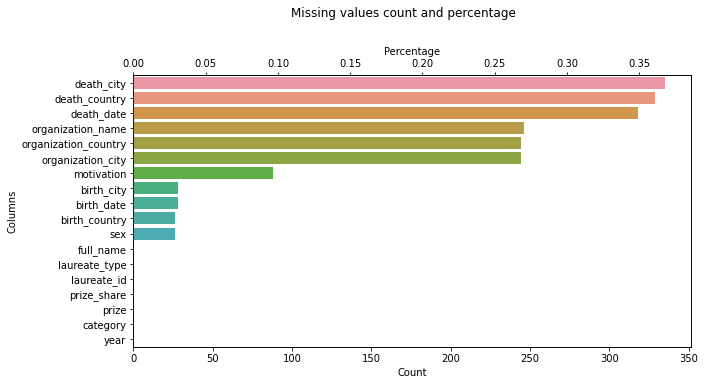

In [11]:
fig, ax_count = plt.subplots(figsize=[10, 5])
sns.barplot(x=count.values, y=count.index)
ax_count.set_xlabel('Count')
ax_count.set_ylabel('Columns')
ax_percentage = ax_count.twiny()
sns.barplot(x=percentage.values, y=percentage.index)
ax_percentage.set_xlabel('Percentage')
fig.suptitle('Missing values count and percentage', y=1.07);

Now, we can better understand the data. As we validate from numeric representation before this, column 'death_city' is the column with most missing values, 'death_country' on the second place, 'death_date' on the third place, and so on.